In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [4]:
# Load the data from CSV
data = pd.read_csv('/Users/mac/Downloads/trainingdataset.csv')




In [6]:
data['Time'] = data.index
# Sort data by time (if not already sorted)
data['Time'] = pd.to_datetime(data['Time'])  # Convert 'Time' column to datetime format
data = data.sort_values(by='Time')



In [7]:
# Define the number of time steps for the input sequence
n_steps = 5  # You can adjust this value based on the desired number of time steps to consider

# Create sequences of input features (speed) and target variable (speed)
sequences = []
for i in range(len(data) - n_steps):
    sequences.append(data['speed'].values[i:i+n_steps+1])

# Convert sequences to numpy array
sequences = np.array(sequences)

# Split sequences into input features (X) and target variable (y)
X = sequences[:, :-1]  # Input features (speed values at time t-5, t-4, ..., t-1)
y = sequences[:, -1]   # Target variable (speed value at time t)



In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input features for LSTM model (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], n_steps, 1))
X_test = X_test.reshape((X_test.shape[0], n_steps, 1))

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50


/Users/mac/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


134/134 - 1s - 6ms/step - loss: 38.3267 - val_loss: 0.1405
Epoch 2/50
134/134 - 0s - 1ms/step - loss: 0.0581 - val_loss: 0.0352
Epoch 3/50
134/134 - 0s - 1ms/step - loss: 0.0307 - val_loss: 0.0371
Epoch 4/50
134/134 - 0s - 1ms/step - loss: 0.0266 - val_loss: 0.0395
Epoch 5/50
134/134 - 0s - 1ms/step - loss: 0.0301 - val_loss: 0.0362
Epoch 6/50
134/134 - 0s - 1ms/step - loss: 0.0268 - val_loss: 0.0327
Epoch 7/50
134/134 - 0s - 1ms/step - loss: 0.0275 - val_loss: 0.0375
Epoch 8/50
134/134 - 0s - 1ms/step - loss: 0.0291 - val_loss: 0.0334
Epoch 9/50
134/134 - 0s - 1ms/step - loss: 0.0251 - val_loss: 0.0369
Epoch 10/50
134/134 - 0s - 1ms/step - loss: 0.0267 - val_loss: 0.0302
Epoch 11/50
134/134 - 0s - 1ms/step - loss: 0.0264 - val_loss: 0.0280
Epoch 12/50
134/134 - 0s - 1ms/step - loss: 0.0229 - val_loss: 0.0427
Epoch 13/50
134/134 - 0s - 1ms/step - loss: 0.0299 - val_loss: 0.0300
Epoch 14/50
134/134 - 0s - 1ms/step - loss: 0.0232 - val_loss: 0.0444
Epoch 15/50
134/134 - 0s - 1ms/step - l

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.0934
Test Loss: 0.09548968821763992
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step


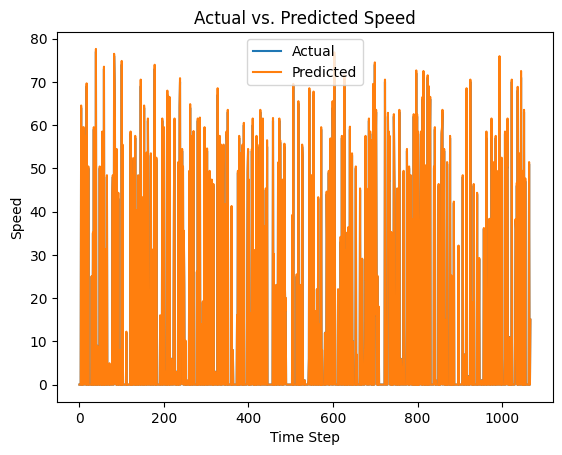

In [12]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Visualize the actual vs. predicted speed values
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Step')
plt.ylabel('Speed')
plt.title('Actual vs. Predicted Speed')
plt.legend()
plt.show()
